In [5]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the data
url = "https://raw.githubusercontent.com/minghao-lu/Project/refs/heads/main/CSCS_data_analysis%201.3.csv"
data = pd.read_csv(url)

# Clean the data
data_cleaned = data.replace({"NA": None, "Presented but no response": None}).dropna()

# Create a contingency table
contingency_table = pd.crosstab(data_cleaned.iloc[:, 0], data_cleaned.iloc[:, -1])

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-Square Statistic: 254.05220467958927
p-value: 1.953642808665661e-47
Degrees of Freedom: 12
Expected Frequencies Table:
[[ 83.15159574 276.02393617 354.74734043  41.82180851 169.25531915]
 [ 38.11489362 126.52340426 162.60851064  19.17021277  77.58297872]
 [ 33.2606383  110.40957447 141.89893617  16.7287234   67.70212766]
 [ 14.47287234  48.04308511  61.74521277   7.27925532  29.45957447]]


In [7]:
from sklearn.linear_model import LogisticRegression

# Define the dependent and independent variables
dependent_var = data_cleaned.iloc[:, 0]
independent_vars = data_cleaned.iloc[:, -3:]

# Convert categorical variables to dummy variables
independent_encoded = pd.get_dummies(independent_vars, drop_first=True)

# Multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(independent_encoded, dependent_var)

# Output model coefficients
print("Coefficients:")
print(model.coef_)
print("Intercept:")
print(model.intercept_)


Coefficients:
[[ 0.0026983   0.19297846 -0.26479592 -0.21161518  0.01803559  0.32043723
  -0.20862697 -0.02816988  0.26657157  0.4571107  -0.09252779  0.36953142]
 [ 0.07280445 -0.08692131  0.01420769 -0.18217787  0.24877636 -0.01087024
  -0.17717495 -0.3775636  -0.3346233  -0.44521998 -0.65197145 -0.73393744]
 [ 0.06460933  0.11040745  0.24502413  0.42829789  0.10603151  0.34796921
   0.01898725  0.88033973  0.09599886  0.56234277  0.49968986  0.98073177]
 [-0.14011208 -0.2164646   0.00556409 -0.03450485 -0.37284345 -0.65753621
   0.36681467 -0.47460625 -0.02794714 -0.57423349  0.24480939 -0.61632574]]
Intercept:
[ 0.5418192   0.65926822 -1.08992811 -0.11115931]


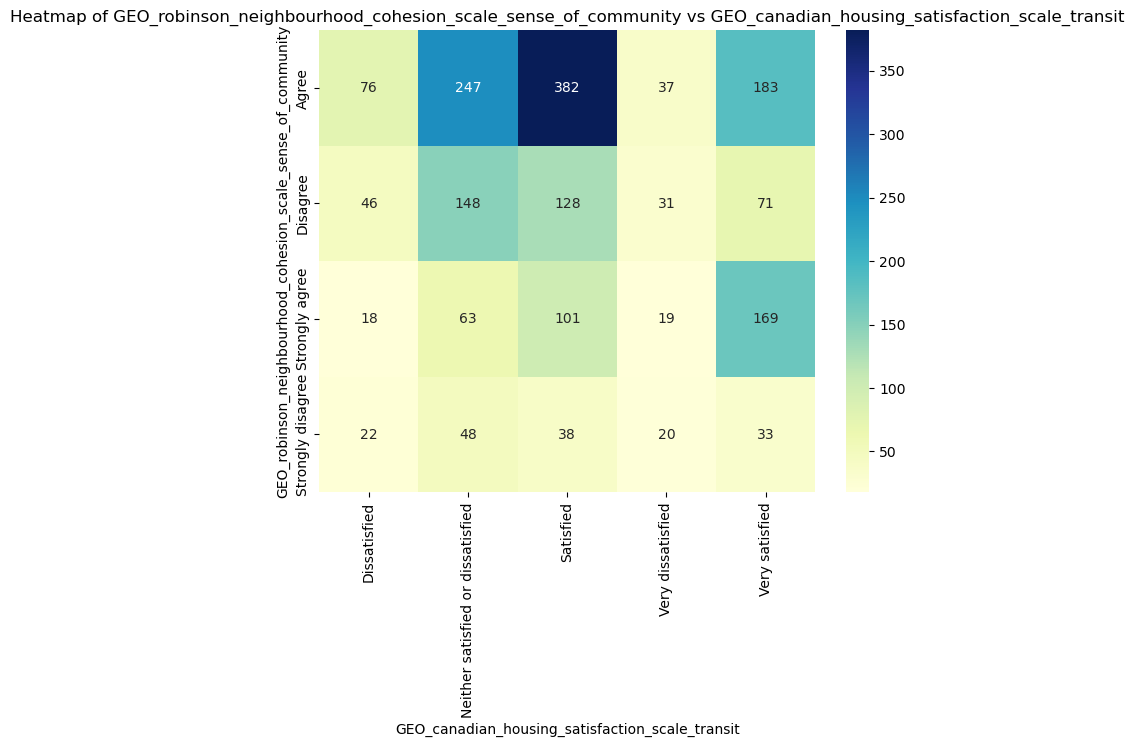

Chi-Square Statistic for GEO_robinson_neighbourhood_cohesion_scale_sense_of_community vs GEO_canadian_housing_satisfaction_scale_transit: 171.24416982378318
p-value for GEO_robinson_neighbourhood_cohesion_scale_sense_of_community vs GEO_canadian_housing_satisfaction_scale_transit: 2.6567764903565837e-30
Degrees of Freedom: 12
Expected Frequencies Table:
[[ 79.70744681 248.96276596 319.32180851  52.6462766  224.36170213]
 [ 36.53617021 114.11914894 146.37021277  24.13191489 102.84255319]
 [ 31.88297872  99.58510638 127.7287234   21.05851064  89.74468085]
 [ 13.87340426  43.33297872  55.57925532   9.16329787  39.05106383]]




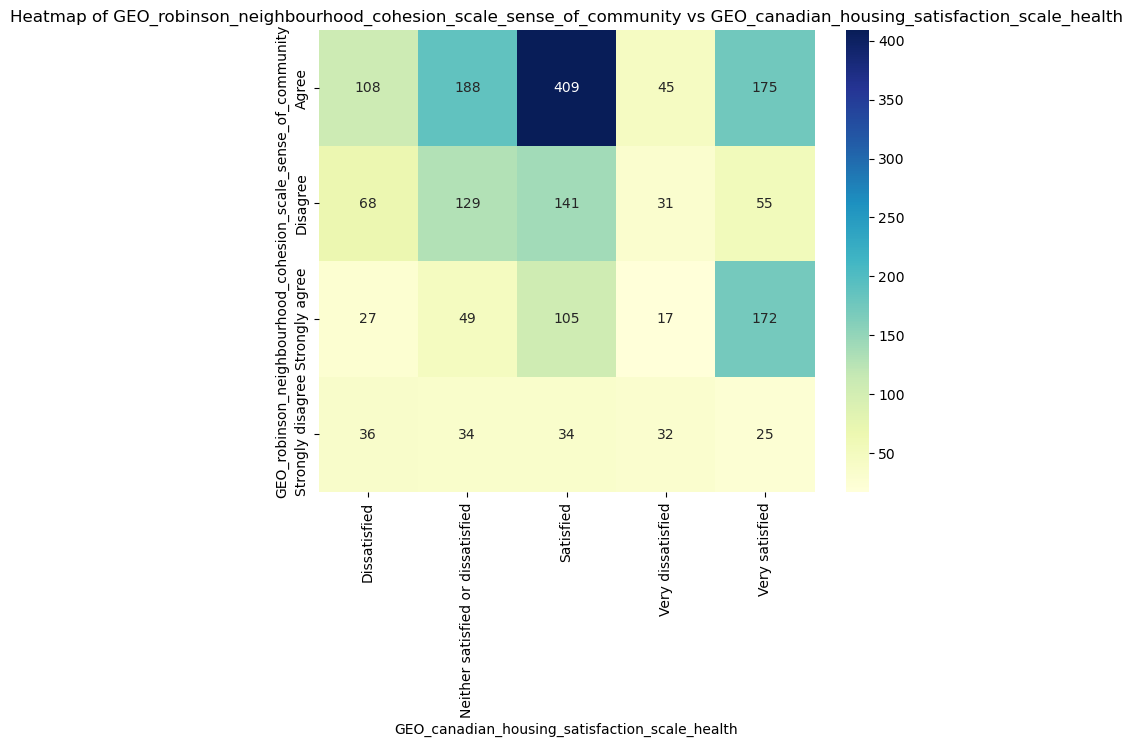

Chi-Square Statistic for GEO_robinson_neighbourhood_cohesion_scale_sense_of_community vs GEO_canadian_housing_satisfaction_scale_health: 255.10187582248784
p-value for GEO_robinson_neighbourhood_cohesion_scale_sense_of_community vs GEO_canadian_housing_satisfaction_scale_health: 1.179759245583529e-47
Degrees of Freedom: 12
Expected Frequencies Table:
[[117.59308511 196.80851064 339.00265957  61.50265957 210.09308511]
 [ 53.90212766  90.21276596 155.39148936  28.19148936  96.30212766]
 [ 47.03723404  78.72340426 135.60106383  24.60106383  84.03723404]
 [ 20.46755319  34.25531915  59.00478723  10.70478723  36.56755319]]




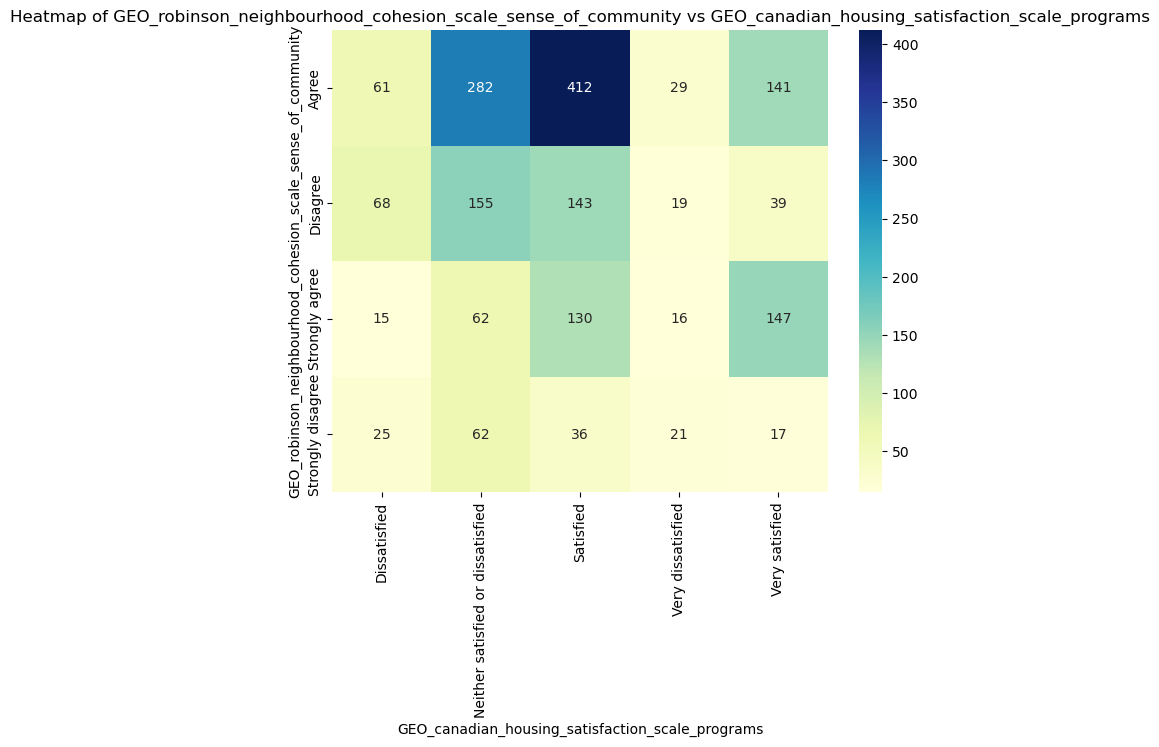

Chi-Square Statistic for GEO_robinson_neighbourhood_cohesion_scale_sense_of_community vs GEO_canadian_housing_satisfaction_scale_programs: 254.05220467958927
p-value for GEO_robinson_neighbourhood_cohesion_scale_sense_of_community vs GEO_canadian_housing_satisfaction_scale_programs: 1.953642808665661e-47
Degrees of Freedom: 12
Expected Frequencies Table:
[[ 83.15159574 276.02393617 354.74734043  41.82180851 169.25531915]
 [ 38.11489362 126.52340426 162.60851064  19.17021277  77.58297872]
 [ 33.2606383  110.40957447 141.89893617  16.7287234   67.70212766]
 [ 14.47287234  48.04308511  61.74521277   7.27925532  29.45957447]]




In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Define a function for generating heatmaps and performing chi-square tests
def analyze_relationship(data, col1, col2):
    # Create a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2])
    
    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Generate a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(f"Heatmap of {col1} vs {col2}")
    plt.show()
    
    # Print chi-square test results
    print(f"Chi-Square Statistic for {col1} vs {col2}: {chi2}")
    print(f"p-value for {col1} vs {col2}: {p}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies Table:")
    print(expected)
    print("\n")

# Load the data
url = "https://raw.githubusercontent.com/minghao-lu/Project/refs/heads/main/CSCS_data_analysis%201.3.csv"
data = pd.read_csv(url)
# Data cleaning: Remove invalid values
data_cleaned = data.replace({"NA": None, "Presented but no response": None}).dropna()

# Get column names
columns = data_cleaned.columns

# Analyze the relationship between the first column and the subsequent columns
for i in range(1, len(columns)):
    analyze_relationship(data_cleaned, columns[0], columns[i])
